### kmeans

#### setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine)) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

In [3]:
# 计算某向量距离质心的欧式距离 
def distEculd(vecA,vecB):
    return np.sqrt(np.sum(np.power(vecA-vecB,2.0)))
    

In [4]:
# 生成dataSet个样本,k是需要聚类的出的类的个数.
def randCent(dataSet,k):
    m,n=dataSet.shape
    centroids=np.mat(np.zeros((k,n),np.float32)) # k行n列的中心坐标
    for j in range(n): # 对于每个特征
        minJ=min(dataSet[:,j])
        maxJ=max(dataSet[:,j])
        delatJ=float(maxJ-minJ)
        centroids[:,j]=minJ+delatJ*np.random.rand(k,1) # 第j个特征的每个样本的质心
    
    return centroids
    

In [5]:
X_train=loadDataSet("testSet.txt")
X_train=np.mat(X_train)
randCent(X_train,3)

matrix([[-3.26163197,  0.94540536],
        [ 1.96309078,  4.99747181],
        [ 0.3656722 , -1.29724491]], dtype=float32)

In [6]:
distEculd(X_train[0],X_train[1])

5.184632816681332

#### kmeans

kmeans简图
![kmeans简图](https://note.youdao.com/yws/api/personal/file/9D61D024B3E745408C249F766CC26692?method=download&shareKey=fe44472dbea390a0bba14907c3a2324c)


In [7]:
def kmeans(dataSet,k,distMeas=distEculd,centSetup=randCent):
    m,n=dataSet.shape
    # 保存类别信息
    clusterAssment=np.mat(np.zeros((m,2),np.float32))
    #clusterAssment=np.zeros((m,2),np.float32)
    centroids=centSetup(dataSet,k) # 随机出一组中心点.
    clusterChanged=True 
    while clusterChanged: # 只要质心改变了,就要重新计算并更新一次.
        clusterChanged=False
        for i in range(m):
            # 每个样本计算对应的距离 
            mindistV=np.inf # step1. 求出每个样本对k个质心的最小的距离.
            minIndex=-1     # step1. 暂存
            for j in range(k): # 对k个聚类的质心.
                distV=distMeas(dataSet[i,:],centroids[j,:]) # 求其欧式距离
                #print("distV:%s,mindistV:%s"%(distV,mindistV))
                if mindistV>distV:
                    mindistV=distV # 记下最小的距离以及所属的k聚类的哪一类.
                    minIndex=j
            if clusterAssment[i,0]!=minIndex:
                clusterChanged=True # 如果该样本改变了所属类别,怎需要重新计算质心.
            #clusterAssment=minIndex,mindistV**2 # 这种写法在新的版本中会把数据格式解析错.
            clusterAssment[i,0]=minIndex
            clusterAssment[i,1]=mindistV**2

        # step2. 等到在某次质心情况下把所有样本都做完一次归类之后,重新计算质心.
        for cent in range(k):
            #sameClust=dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            #print("the %sth cluster's samples are : sameClust:%s"%(cent,sameClust))
            #print(np.nonzero(clusterAssment[:,0])) # 第一列是每个样本输入的k聚类之一的id.比如说是第一类.第二类,第三类.
            sameClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:]=np.mean(sameClust,axis=0) # 保持横轴形式,把列求和进而求均值.
            print("centroids[%s,:]=%s"%(cent,centroids[cent,:]))
    return centroids,clusterAssment

In [8]:
centroids,clusterAssment=kmeans(X_train,3,distEculd,randCent)

centroids[0,:]=[[ 2.52560401 -0.01554712]]
centroids[1,:]=[[-2.54183912  2.93204474]]
centroids[2,:]=[[-3.43056583 -2.38898635]]
centroids[0,:]=[[ 2.73590207  0.06033105]]
centroids[1,:]=[[-2.25437284  2.9018054 ]]
centroids[2,:]=[[-3.38237047 -2.9473362 ]]
centroids[0,:]=[[ 2.93367171  0.07055631]]
centroids[1,:]=[[-1.94392526  2.96291876]]
centroids[2,:]=[[-3.01169467 -3.0123868 ]]
centroids[0,:]=[[ 2.96765828 -0.04151062]]
centroids[1,:]=[[-1.78883982  3.00116515]]
centroids[2,:]=[[-3.01169467 -3.0123868 ]]
centroids[0,:]=[[ 2.99405098 -0.16052631]]
centroids[1,:]=[[-1.6334182   3.03655887]]
centroids[2,:]=[[-3.01169467 -3.0123868 ]]
centroids[0,:]=[[ 2.99405098 -0.16052631]]
centroids[1,:]=[[-1.6334182   3.03655887]]
centroids[2,:]=[[-3.01169467 -3.0123868 ]]


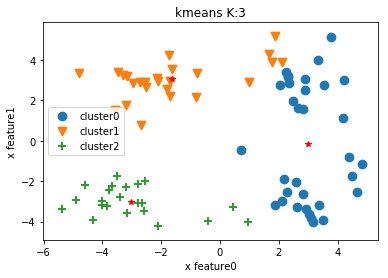

In [9]:
# 显示聚类结果
# -------------
# dataSet: 数据集
# k: k个聚类
# clusterAssment: 包含有所有样本属于哪个类的信息.
# centroids: 包含k个聚类的质心
def show_clustter_image(dataSet,k,clusterAssment,centroids):
    dict_subclass={}
    axes = plt.gca()
    centroids=np.mat(centroids)
    markers=['o','v','+','x','^','<','>','1','2','3','4','s','p','*','h','H','D','d','|','_','.',',']
    for cent in range(k):
        sameClust=dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
        dict_subclass[cent]=sameClust
        axes.scatter(np.array(sameClust[:,0]), np.array(sameClust[:,1]), marker=markers[cent], s=60, linewidth=2, label="cluster%s"%(cent))
        centroidsA=centroids[cent].A # mat和array格式导致解析时候有些问题.在遇到这些问题不同格式可以都尝试下.
        #centroidsA=centroids[cent]
        plt.plot(centroidsA[0][0],centroidsA[0][1],marker='*',c='r')
        
    axes.set_xlabel("x feature0")
    axes.set_ylabel("x feature1")
    axes.set_title("kmeans K:%s" %(k))
    axes.legend(frameon= True, fancybox = True);
    
show_clustter_image(X_train,3,clusterAssment,centroids)

#### 二分K-均值聚类

In [10]:
def biKmeans(dataSet,k,distMear=distEculd):
    m,n=dataSet.shape
    centroidAss= np.mat(np.zeros((m,2),np.float32)) # mx2 注意这个np.mat用法.
    # 质心
    centroid0=np.mean(dataSet,axis=0).tolist()[0]
    print(centroid0)
    centList=[centroid0]
    # 预先计算centroid0和所有样本的距离
    for j in range(m):
        centroidAss[j,1]=distMear(np.mat(centroid0),dataSet[j,:])**2
    while(len(centList)<k): # 我们是二分类做聚类.
        lowestSSE=np.inf
        for i in range(len(centList)): # 遍历所有已有的聚类,在这个聚类中进行二分,然后计算使得当前样本集的聚类最小的那个聚类方法.
            # 对于每一个分类都进行二分类
            curCluster=dataSet[np.nonzero(centroidAss[:,0].A==i)[0],:]
            centroidMat,splitClustAss=kmeans(curCluster,2,distMear)
            sseSplit=np.sum(splitClustAss[:,1])
            sseNonSplit=np.sum(centroidAss[np.nonzero(centroidAss[:,0].A!=i)[0],1])
            print("sseSplit:%s,sseNonSplit:%s"%(sseSplit,sseNonSplit))
            if(sseSplit+sseNonSplit<lowestSSE): # 保存这次聚类的参数.
                lowestSSE=sseSplit+sseNonSplit
                bestNewCent=centroidMat
                bestClustAss=splitClustAss.copy()
                bestCentToSplit=i
        # 此时已经拿到最佳二分聚类了.
        # 原本在二分聚类中类名字为1的要在总的聚类中把类名字标记为len(centList)
        # 原本在二分聚类中类名字为0的要在总的聚类中把类名字标记为从centList中第几个centorid划分的那个"几"
        bestClustAss[np.nonzero(bestClustAss[:,0].A==1)[0],0]=len(centList) 
        bestClustAss[np.nonzero(bestClustAss[:,0].A==0)[0],0]=bestCentToSplit
        
        print("bestCentToSplit",bestCentToSplit)
        print("bestClustAss",bestClustAss)
        print("len(bestClustAss)",len(bestClustAss))
        centList[bestCentToSplit]=bestNewCent[0,:].tolist()[0] # 原本在二分聚类中类名字为0描述的第0个中心点给到i号中心点list,注意这部分的tolist()[0]
        centList.append(bestNewCent[1,:].tolist()[0]) # 原本在二分聚类中类名字为1描述的第1个中心点,添加到centList中.
        centroidAss[np.nonzero(centroidAss[:,0].A==bestCentToSplit)[0],:]=bestClustAss
    
    return centList,centroidAss
            
        
    

In [11]:
centroids_2bi,clusterAssment_2bi=biKmeans(X_train,4,distEculd)

[-0.10361321250000004, 0.05430119999999998]
centroids[0,:]=[[ 1.31395042  0.99705851]]
centroids[1,:]=[[-3.4112618  -2.14546585]]
centroids[0,:]=[[ 1.33687222  1.16964924]]
centroids[1,:]=[[-3.09539056 -2.26219082]]
centroids[0,:]=[[ 1.33687222  1.16964924]]
centroids[1,:]=[[-3.09539056 -2.26219082]]
sseSplit:914.116,sseNonSplit:0.0
bestCentToSplit 0
bestClustAss [[  0.00000000e+00   9.81001472e+00]
 [  0.00000000e+00   2.80330029e+01]
 [  0.00000000e+00   1.76467762e+01]
 [  1.00000000e+00   6.42793798e+00]
 [  0.00000000e+00   3.21076870e+00]
 [  1.00000000e+00   1.46162157e+01]
 [  1.00000000e+00   1.36558065e+01]
 [  1.00000000e+00   4.42624748e-01]
 [  0.00000000e+00   1.95471132e+00]
 [  0.00000000e+00   2.42766724e+01]
 [  0.00000000e+00   3.00674992e+01]
 [  1.00000000e+00   7.96047509e-01]
 [  0.00000000e+00   1.15396814e+01]
 [  0.00000000e+00   1.51191187e+01]
 [  0.00000000e+00   3.11990595e+00]
 [  1.00000000e+00   1.02014675e+01]
 [  0.00000000e+00   2.39792562e+00]
 [  0

In [12]:
# 显示聚类结果
# -------------
# dataSet: 数据集
# k: k个聚类
# clusterAssment: 包含有所有样本属于哪个类的信息.
# centroids: 包含k个聚类的质心
def show_clustter_image_nomat(dataSet,k,clusterAssment,centroids):
    dict_subclass={}
    axes = plt.gca()
    ####centroids=np.mat(centroids)
    markers=['o','v','+','x','^','<','>','1','2','3','4','s','p','*','h','H','D','d','|','_','.',',']
    for cent in range(k):
        sameClust=dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
        dict_subclass[cent]=sameClust
        axes.scatter(np.array(sameClust[:,0]), np.array(sameClust[:,1]), marker=markers[cent], s=60, linewidth=2, label="cluster%s"%(cent))
        #centroidsA=centroids[cent].A # mat和array格式导致解析时候有些问题.在遇到这些问题不同格式可以都尝试下.
        centroidsA=centroids[cent]
        print(centroidsA)
        print(centroidsA[0])
        print(centroidsA[1])
        plt.plot(centroidsA[0],centroidsA[1],marker='*',c='r')
        
    axes.set_xlabel("x feature0")
    axes.set_ylabel("x feature1")
    axes.set_title("kmeans K:%s" %(k))
    axes.legend(frameon= True, fancybox = True);
    


[3.0981428623199463, -2.4304122924804688]
3.0981428623199463
-2.4304122924804688
[-3.095390558242798, -2.262190818786621]
-3.095390558242798
-2.262190818786621
[-2.1879994869232178, 3.0182478427886963]
-2.1879994869232178
3.0182478427886963
[2.543914556503296, 3.212996006011963]
2.543914556503296
3.212996006011963


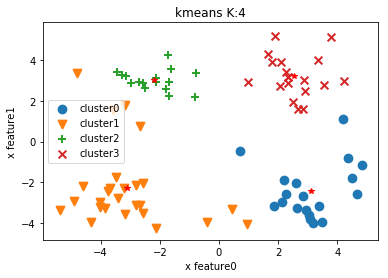

In [13]:
show_clustter_image_nomat(X_train,4,clusterAssment_2bi,centroids_2bi)

In [14]:
centroids_2bi

[[3.0981428623199463, -2.4304122924804688],
 [-3.095390558242798, -2.262190818786621],
 [-2.1879994869232178, 3.0182478427886963],
 [2.543914556503296, 3.212996006011963]]

---
### 波特兰地图

In [15]:
def distSLC(vectA,vectB): #球面余弦定理
    a=np.sin(vectA[0,1]*np.pi/180)*np.sin(vectB[0,1]*np.pi/180)
    b=np.cos(vectA[0,1]*np.pi/180)*np.cos(vectB[0,1]*np.pi/180)*np.cos(np.pi/180*(vectB[0,0]-vectA[0,0]))
    return np.arccos(a+b)*6371.0

In [16]:
def clusterClubs(k=5):
    dataList=[] # 保存places.txt的经纬坐标
    for line in open('places.txt').readlines():
        lineArr=line.split('\t')
        dataList.append([float(lineArr[4]),float(lineArr[3])])
        #print("lineArr[4]:%s,lineArr[3]:%s"%(lineArr[4],lineArr[3]))
    dataMat=np.mat(dataList) # List类型转成Mat类型
    #print(dataMat.shape)
    myCentroids,clustAssing=biKmeans(dataMat,k,distSLC)
    fig=plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(k):
        # 找到第k个聚类的所有样本
        k_sample_data=dataMat[np.nonzero(clustAssing[:,0].A==i)[0],:]
        cur_marker=scatterMarkers[i%len(scatterMarkers)]
        ax1.scatter(k_sample_data[:,0].flatten().A[0], k_sample_data[:,1].flatten().A[0], marker=cur_marker, s=90)
    #print("TUPLE")
    #print(np.mat(myCentroids).shape)
    myCentroids_mat=np.mat(myCentroids)
    #print(myCentroids_mat[:,0])
    #print((myCentroids_mat[:,0].flatten().A)[0])
    #print((myCentroids_mat[:,1].flatten().A)[0])
    ax1.scatter(myCentroids_mat[:,0].flatten().A[0], myCentroids_mat[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

[-122.63167620289852, 45.512306695652164]
centroids[0,:]=[[-122.62464905   45.50658798]]
centroids[1,:]=[[-122.74585724   45.60526657]]
centroids[0,:]=[[-122.61899567   45.50344467]]
centroids[1,:]=[[-122.72836304   45.57987976]]
centroids[0,:]=[[-122.60434723   45.5045166 ]]
centroids[1,:]=[[-122.74941254   45.54586029]]
centroids[0,:]=[[-122.59648895   45.50821686]]
centroids[1,:]=[[-122.74823761   45.52585602]]
centroids[0,:]=[[-122.58032227   45.51010895]]
centroids[1,:]=[[-122.72797394   45.5164299 ]]
centroids[0,:]=[[-122.5681839    45.51029587]]
centroids[1,:]=[[-122.71421051   45.5149231 ]]
centroids[0,:]=[[-122.56409454   45.51016235]]
centroids[1,:]=[[-122.70981598   45.51478577]]
centroids[0,:]=[[-122.56409454   45.51016235]]
centroids[1,:]=[[-122.70981598   45.51478577]]
sseSplit:3073.83,sseNonSplit:0.0
bestCentToSplit 0
bestClustAss [[   1.           47.34999084]
 [   1.           36.58092117]
 [   1.           22.67691231]
 [   1.           60.02953339]
 [   1.           

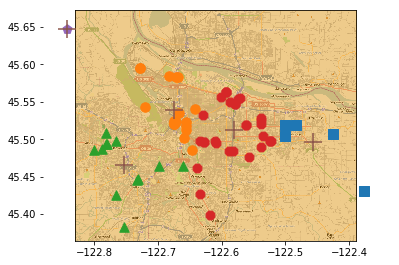

In [17]:
clusterClubs(k=5)